    1. Package load
    2. Data load
    3. Data 탐색(EDA)
    4. 상관분석
    
    5. 결론 : 안양시 만안구( 16806 )
       

In [1]:
# pandas를 pd이름으로 호출
import requests
from io import BytesIO
from itertools import product
from datetime import datetime

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.ticker as plticker
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
import statsmodels.api as sm
import pmdarima as pm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller 
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

plt.rc('font', family='NanumGothic')
plt.rcParams['font.size'] = 14
plt.rcParams["figure.figsize"] = (22,4)

In [2]:
# customer_lib_1.csv 파일을 불러와서 변수 customer_1 값으로 할당

df = pd.read_csv('../div_data/안양시 만안구.csv')
df_final = pd.read_csv('../data/230119_final_join.csv')

In [3]:
df_final['region2'].unique()

array(['고양시 덕양구', '고양시 일산동구', '고양시 일산서구', '광명시', '구리시', '김포시', '남양주시',
       '성남시 분당구', '성남시 수정구', '성남시 중원구', '안양시 동안구', '안양시 만안구', '양평군',
       '의정부시', '하남시', '화성시'], dtype=object)

In [4]:
#data 확인
df.head()

,region1,region2,reservation_return_at,reservation_start_at,age_group,gender,car_model,r_week_day,s_week_day,is_weekend,r_weeknum,r_year,r_month,r_yyyyww,s_weeknum,s_year,s_month,s_yyyyww,date_term
0,경기도,안양시 만안구,2019-02-27 14:27:27+00:00,2019-02-27 13:00:00+00:00,3,male,경형,2,2,0,9,2019,2019-02,2019-9,9,2019,2019-02,2019-9,1.46
1,경기도,안양시 만안구,2019-08-16 02:22:43+00:00,2019-08-15 23:30:00+00:00,1,female,준중형,4,3,0,33,2019,2019-08,2019-33,33,2019,2019-08,2019-33,2.88
2,경기도,안양시 만안구,2019-11-18 02:04:45+00:00,2019-11-17 08:20:00+00:00,1,male,준중형,0,6,1,47,2019,2019-11,2019-47,46,2019,2019-11,2019-46,17.75
3,경기도,안양시 만안구,2019-06-06 21:43:45+00:00,2019-06-06 18:50:00+00:00,1,female,소형SUV,3,3,0,23,2019,2019-06,2019-23,23,2019,2019-06,2019-23,2.90
4,경기도,안양시 만안구,2019-11-25 19:28:47+00:00,2019-11-25 15:10:00+00:00,1,male,소형SUV,0,0,0,48,2019,2019-11,2019-48,48,2019,2019-11,2019-48,4.31


In [5]:
#EDA  ... 지역 확인
print("region1 : ",len(df['region1'].unique()))
print(df['region1'].unique())
print("region2 : ",len(df['region2'].unique()))
print(df['region2'].unique())
print(len(df))

region1 :  1
['경기도']
region2 :  1
['안양시 만안구']
16806


In [6]:
df['index_int'] = ''

for i , value in enumerate(df['region1']):
    df['index_int'][i] = i


/tmp/ipykernel_243/3612480014.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['index_int'][i] = i


In [7]:
df['reservation_return_hour3'] = ''
for i , value in enumerate(df['reservation_return_at']):
    temp = str(df['reservation_return_at'][i])
    df['reservation_return_hour3'][i] = temp[10:13]

/tmp/ipykernel_243/818228797.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reservation_return_hour3'][i] = temp[10:13]


In [8]:
#column 변경  : object > date 
df['reservation_return_at'] = pd.to_datetime(df['reservation_return_at'])
df['reservation_start_at'] = pd.to_datetime(df['reservation_start_at'])
df['gender'] = df['gender'].astype(str)
df['car_model'] = df['car_model'].astype(str)
df['region1'] = df['region1'].astype(str)
df['region2'] = df['region2'].astype(str)

In [9]:

df['reservation_return_date'] = df['reservation_return_at'].dt.to_period(freq = 'D')
df['reservation_start_date'] = df['reservation_start_at']. dt.to_period(freq = 'D')
df['reservation_return_hour'] = df['reservation_return_at'].dt.to_period(freq = 'H')
df['reservation_start_hour'] = df['reservation_start_at']. dt.to_period(freq = 'H')


/opt/conda/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


In [10]:
temp_hour = df['reservation_return_hour3'].value_counts().sort_index()

In [11]:
df_weekend = df[df['is_weekend'] == 1]  
print(round(len(df_weekend)/len(df),2))
temp_weekend_hour = df_weekend['reservation_return_hour3'].value_counts().sort_index()

0.35


In [12]:
df_weekday = df[df['is_weekend'] == 0]  
print(round(len(df_weekday)/len(df),2))
temp_weekday_hour = df_weekday['reservation_return_hour3'].value_counts().sort_index()

0.65


<AxesSubplot:>

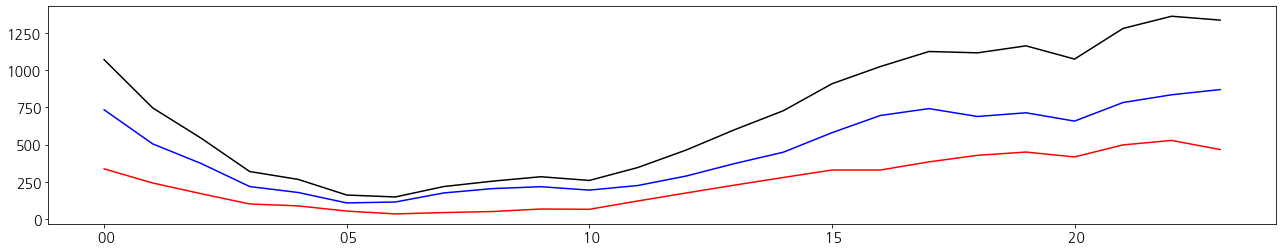

In [13]:
temp_hour.plot(color='black')
temp_weekday_hour.plot(color='blue')
temp_weekend_hour.plot(color='red')

In [14]:
print("s_month : ",len(df['s_month'].unique()))
print(df['s_month'].unique())
print(df['s_month'].value_counts().sort_index())

s_month :  13
['2019-02' '2019-08' '2019-11' '2019-06' '2019-05' '2019-01' '2019-07'
 '2019-09' '2019-04' '2019-03' '2019-10' '2019-12' '2018-12']
2018-12       1
2019-01    1162
2019-02    1185
2019-03    1331
2019-04    1512
2019-05    1653
2019-06    1639
2019-07    1677
2019-08    1728
2019-09    1673
2019-10    1670
2019-11    1552
2019-12      23
Name: s_month, dtype: int64


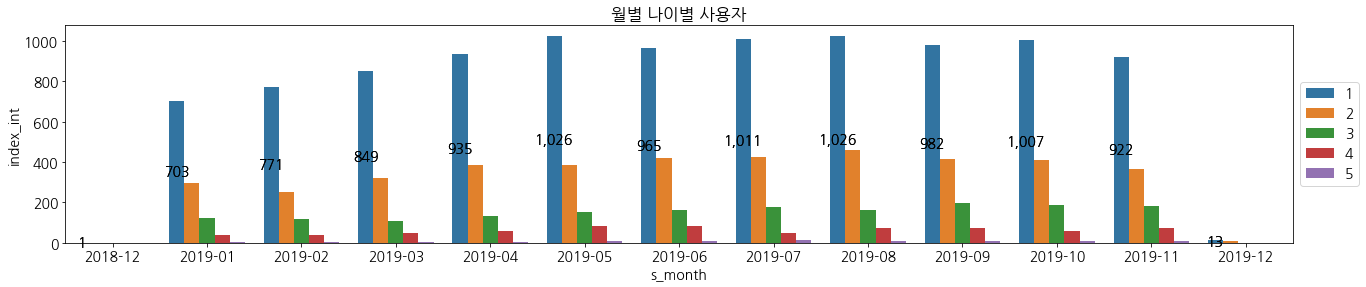

In [15]:
#EDA  ... 지역별 월별 사용자 확인(3) .. 지역 2
grouped = df.groupby([df['age_group'], df['s_month']]).count().sort_values(by='s_month')
ax = sns.barplot(data=grouped.reset_index(), x='s_month', y='index_int', hue='age_group')

containers = ax.containers[0]
containers0 = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
# plt.rcParams['font.size'] = 8
plt.title('월별 나이별 사용자')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
# 20대 7월, 6월,8월 순 

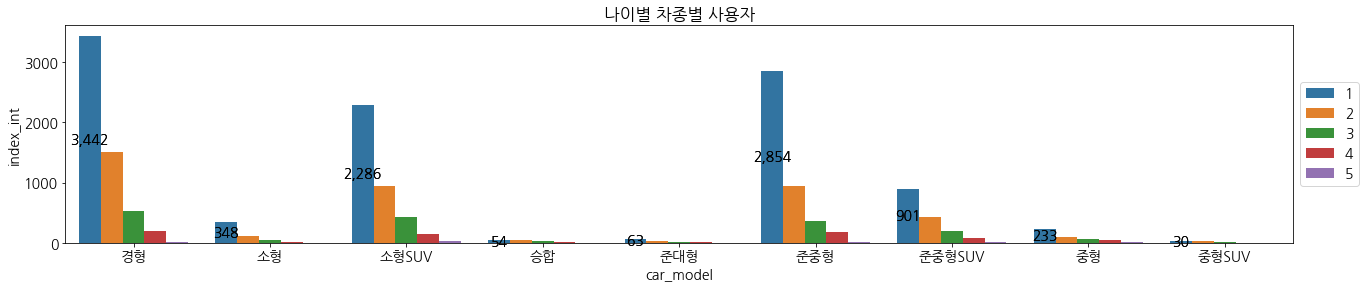

In [16]:
#EDA  ... 지역별 월별 사용자 확인(3) .. 지역 2
grouped = df.groupby([df['age_group'], df['car_model']]).count().sort_values(by='car_model')
ax = sns.barplot(data=grouped.reset_index(), x='car_model', y='index_int', hue='age_group')

containers = ax.containers[0]
containers0 = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
# plt.rcParams['font.size'] = 8
plt.title('나이별 차종별 사용자')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
# 20대, 경형, 소형suv , 준중형 순

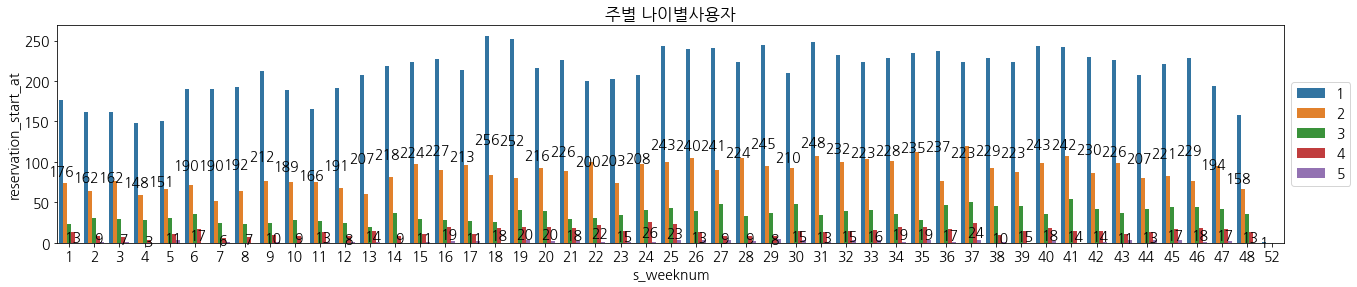

In [17]:
#EDA  ... 지역별 월별 사용자 확인(3) .. 지역 2
grouped = df.groupby([df['age_group'], df['s_weeknum']]).count().sort_values(by='s_weeknum')
ax = sns.barplot(data=grouped.reset_index(), x='s_weeknum', y='reservation_start_at', hue='age_group')

containers = ax.containers[-2]
containers0 = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
# plt.rcParams['font.size'] = 8
plt.title('주별 나이별사용자')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
#20대 29,33주차 순 

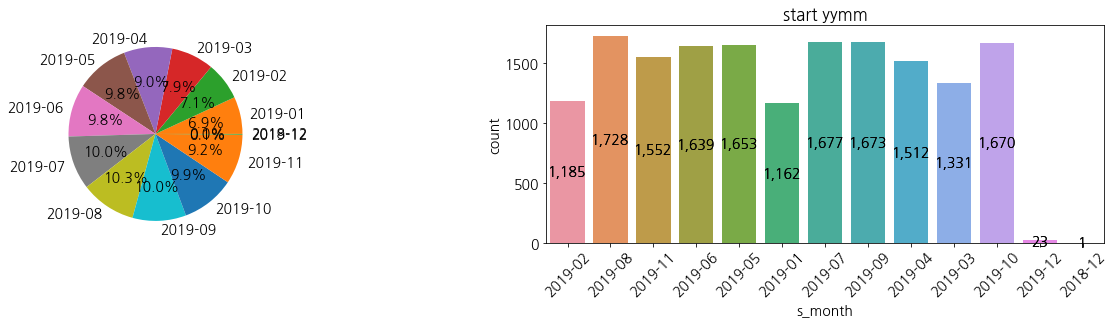

In [18]:
# axes[0].plot(x, y)
fig, axes = plt.subplots(1,2)
plt.rcParams["figure.figsize"] = (22,4)

pie_data = df.groupby(['s_month']).count().region2
axes[0].pie(pie_data, labels=pie_data.index, autopct = '%1.1f%%')
# plt.title('지역별 사용자')

ax = sns.countplot(data=df, x='s_month')  #x축 라벨

containers = ax.containers[-1]
containers0 = ax.containers[0]
axes[1].bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
axes[1].bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('start yymm')
plt.xticks(rotation=45)
plt.show()
# 10월, 7월 순

In [19]:
print(df['age_group'].unique())
print(df['age_group'].value_counts()) # 1 : 20~29 세, 2 : 30~39 세, 3 : 40~49 세,- 4 : 50~59 세,- 5 : 60세 이상

[3 1 4 2 5]
1    10211
2     4142
3     1698
4      676
5       79
Name: age_group, dtype: int64


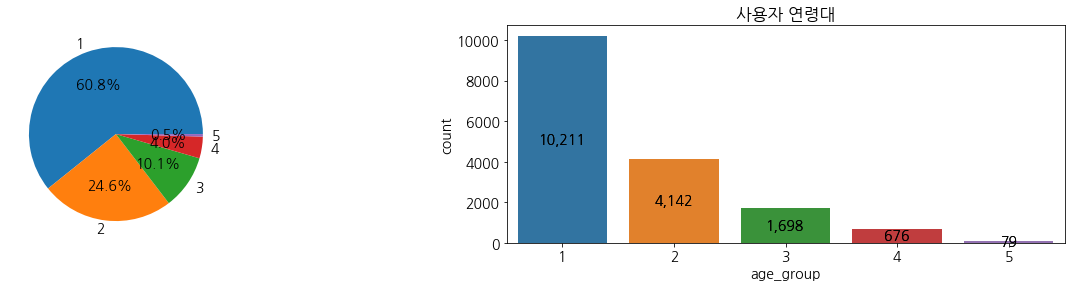

In [20]:
#EDA  ...사용자 연령대 (1)
fig, axes = plt.subplots(1,2)
plt.rcParams["figure.figsize"] = (22,4)

pie_data = df.groupby(['age_group']).count().region2
axes[0].pie(pie_data, labels=pie_data.index, autopct = '%1.1f%%')
plt.title('사용자 연령대')

ax = sns.countplot(data=df, x='age_group')   #x축 라벨

containers = ax.containers[-1]
containers0 = ax.containers[0]
axes[1].bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
axes[1].bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('사용자 연령대')
plt.show()

In [21]:
#EDA  ...사용자 연령대 (2)
print(df['gender'].unique())
print(df['gender'].value_counts()) # 1 : 20~29 세, 2 : 30~39 세, 3 : 40~49 세,- 4 : 50~59 세,- 6 : 60세 이상

['male' 'female' 'unknown']
male       13173
female      3070
unknown      563
Name: gender, dtype: int64


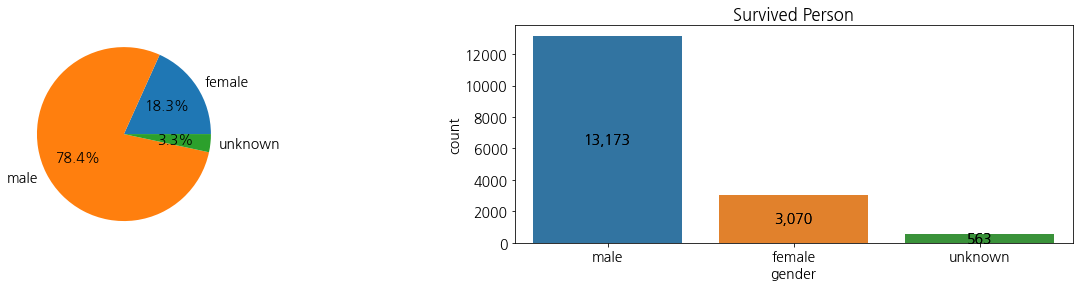

In [22]:
#EDA  ...사용자 성별(1)
fig, axes = plt.subplots(1,2)
plt.rcParams["figure.figsize"] = (22,4)

pie_data = df.groupby(['gender']).count().region2
axes[0].pie(pie_data, labels=pie_data.index, autopct = '%1.1f%%')
plt.title('지역별 사용자')

ax = sns.countplot(data=df, x='gender')   #x축 라벨

containers = ax.containers[-1]
containers0 = ax.containers[0]
axes[1].bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
axes[1].bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('Survived Person')
plt.show()

In [23]:
#EDA  ...차종별  ['경형' '준중형' 준중형SUV' '소형SUV' '소형' '준대형' '중형' ??? 중형SUV' '승합' '??수입' ??'대형']
print("car_model : ",len(df['car_model'].unique()))
print(df['car_model'].unique().sort())
print(df['car_model'].value_counts()) 

car_model :  9
None
경형        5684
준중형       4349
소형SUV     3821
준중형SUV    1627
소형         533
중형         439
승합         156
준대형        125
중형SUV       72
Name: car_model, dtype: int64


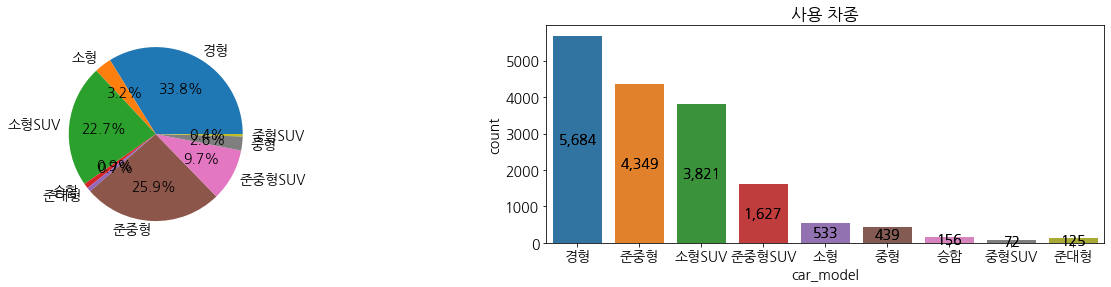

In [24]:
#EDA  ...차종별(1)
fig, axes = plt.subplots(1,2)
plt.rcParams["figure.figsize"] = (22,4)

pie_data = df.groupby(['car_model']).count().region2
axes[0].pie(pie_data, labels=pie_data.index, autopct = '%1.1f%%')
plt.title('사용 차종')

ax = sns.countplot(data=df, x='car_model')   #x축 라벨

containers = ax.containers[-1]
containers0 = ax.containers[0]
axes[1].bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
axes[1].bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('사용 차종')
plt.show()

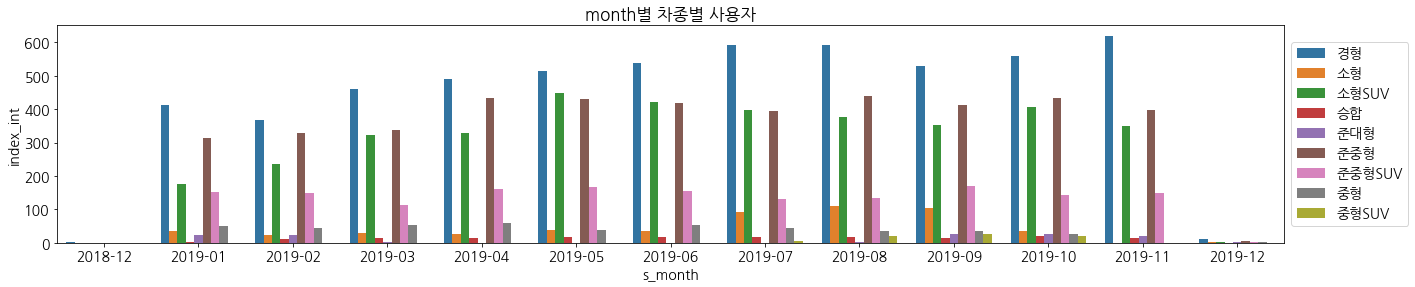

In [25]:
#EDA  ...차종별(1)  ..+지역별
grouped = df['index_int'].groupby([df['region2'], df['car_model'],df['s_month']]).count()
ax = sns.barplot(data=grouped.reset_index(), x='s_month', y='index_int', hue='car_model')

containers = ax.containers[-1]
containers0 = ax.containers[0]
axes[1].bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
axes[1].bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')

plt.title('month별 차종별 사용자')
# plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
#2,3,4,5 준중형, 그 외 경형

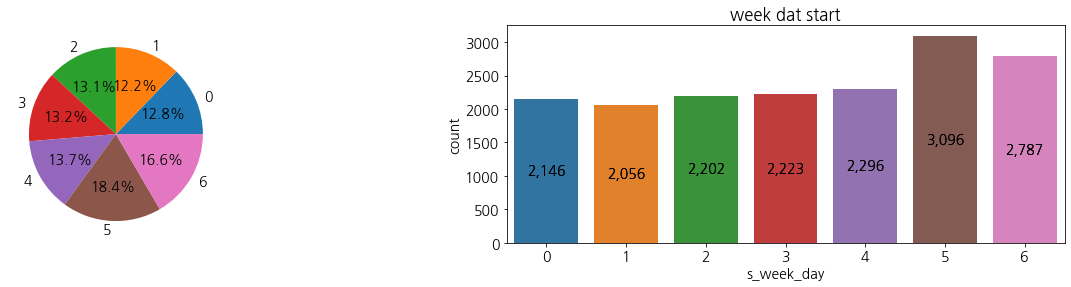

In [26]:
#EDA  ...weekday(1)  0 월요일 .... 6 일요일
fig, axes = plt.subplots(1,2)
plt.rcParams["figure.figsize"] = (22,6)
plt.rc('figure', titlesize=12)
plt.rc('axes', labelsize=10) 

pie_data = df.groupby(['s_week_day']).count().region2
axes[0].pie(pie_data, labels=pie_data.index, autopct = '%1.1f%%')
plt.title('week dat start')

ax = sns.countplot(data=df, x='s_week_day')   #x축 라벨

containers = ax.containers[-1]
containers0 = ax.containers[0]
axes[1].bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
axes[1].bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('week dat start')
plt.show()

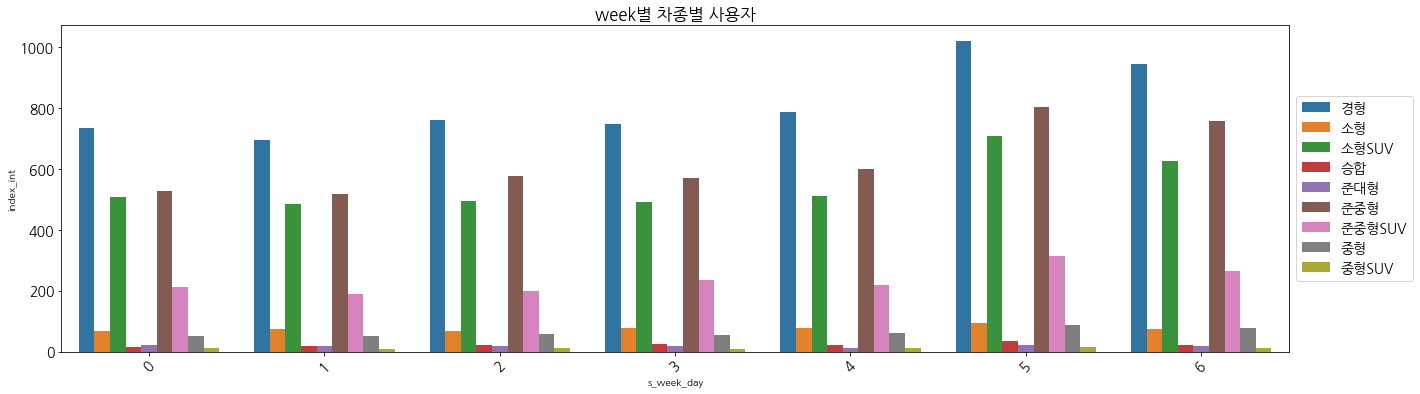

In [27]:
#EDA  ...차종별(1)  ..+지역별2
grouped = df['index_int'].groupby([df['s_week_day'], df['car_model']]).count()
ax = sns.barplot(data=grouped.reset_index(), x='s_week_day', y='index_int', hue='car_model')

containers = ax.containers[-1]
containers0 = ax.containers[0]
axes[1].bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
axes[1].bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')

plt.title('week별 차종별 사용자')
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
#경형, > 준중형 > 소형suv

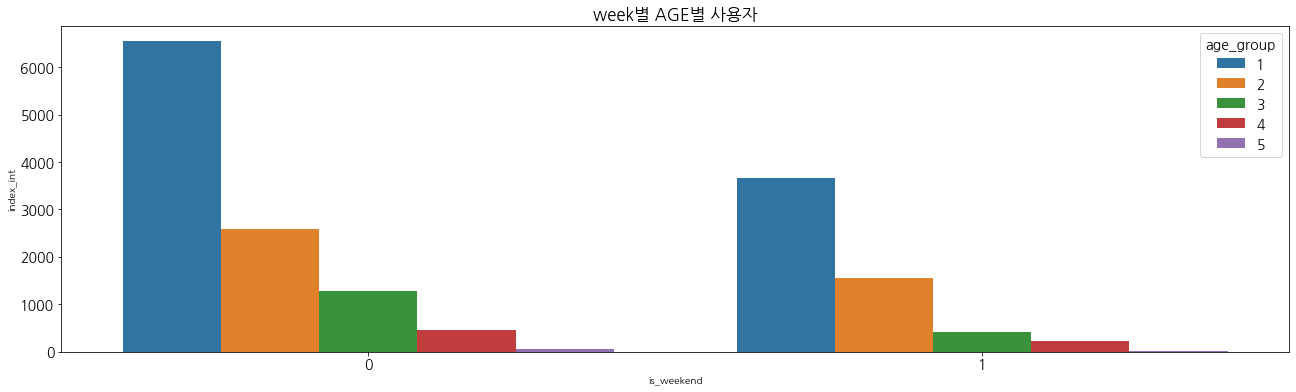

In [28]:
#EDA  ...weekday(1) + 지역
grouped = df['index_int'].groupby([df['is_weekend'],df['age_group']]).count()
ax = sns.barplot(data=grouped.reset_index(), x='is_weekend', y='index_int', hue='age_group')

containers = ax.containers[-1]
containers0 = ax.containers[0]
axes[1].bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
axes[1].bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')

plt.title('week별 AGE별 사용자')
# plt.xticks(rotation=45)
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


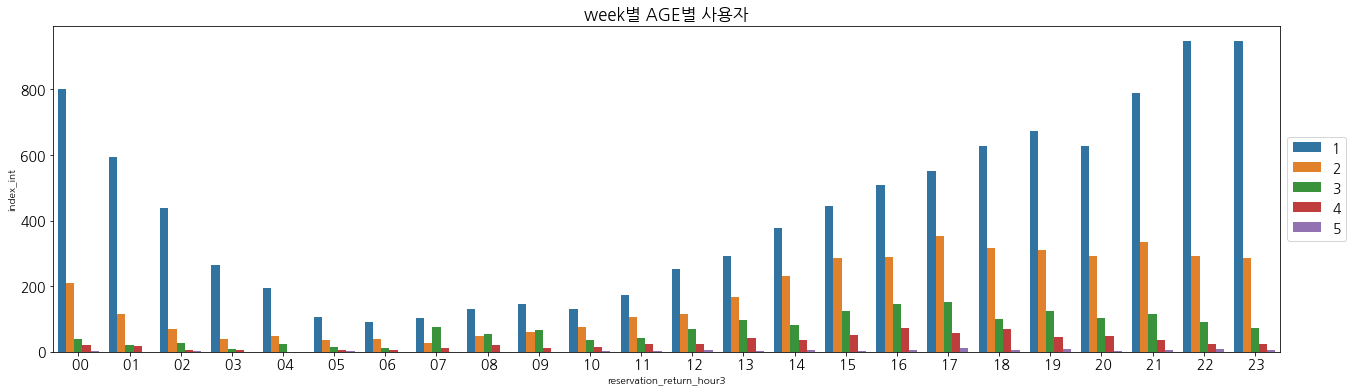

In [29]:
#EDA  ...weekday(1) + 지역
grouped = df['index_int'].groupby([df['reservation_return_hour3'],df['age_group']]).count()
ax = sns.barplot(data=grouped.reset_index(), x='reservation_return_hour3', y='index_int', hue='age_group')

containers = ax.containers[-1]
containers0 = ax.containers[0]
axes[1].bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
axes[1].bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')

plt.title('week별 AGE별 사용자')
# plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
#오후 3시 이후 많이 빌림

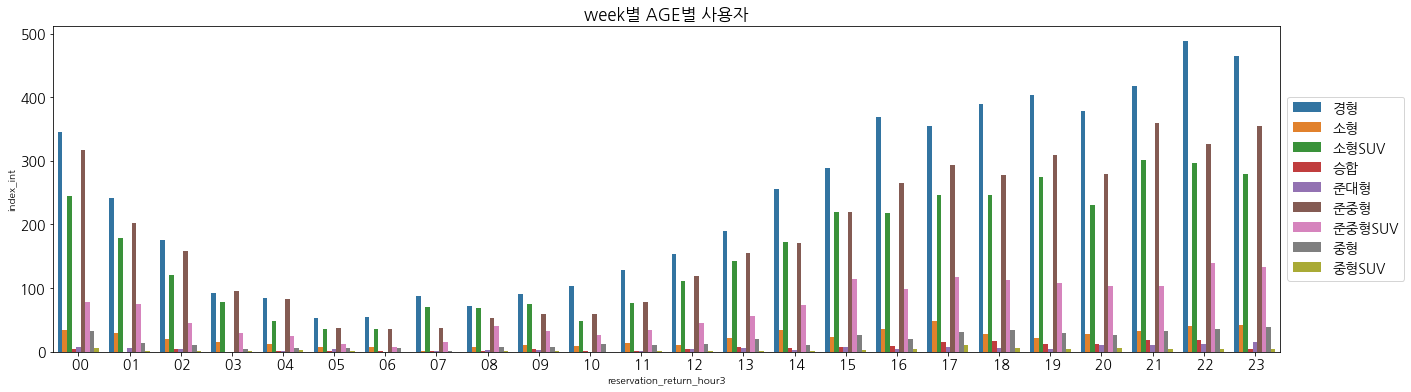

In [30]:
#EDA  ...weekday(1) + 지역
grouped = df['index_int'].groupby([df['reservation_return_hour3'],df['car_model']]).count()
ax = sns.barplot(data=grouped.reset_index(), x='reservation_return_hour3', y='index_int', hue='car_model')

containers = ax.containers[-1]
containers0 = ax.containers[0]
axes[1].bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
axes[1].bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')

plt.title('week별 AGE별 사용자')
# plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


상관분석---------------------------------------------------------------------------------------------------------------------------

In [31]:
df1 = df

In [32]:
df1.head()

,region1,region2,reservation_return_at,reservation_start_at,age_group,gender,car_model,r_week_day,s_week_day,is_weekend,...,s_year,s_month,s_yyyyww,date_term,index_int,reservation_return_hour3,reservation_return_date,reservation_start_date,reservation_return_hour,reservation_start_hour
0,경기도,안양시 만안구,2019-02-27 14:27:27+00:00,2019-02-27 13:00:00+00:00,3,male,경형,2,2,0,...,2019,2019-02,2019-9,1.46,0,14,2019-02-27,2019-02-27,2019-02-27 14:00,2019-02-27 13:00
1,경기도,안양시 만안구,2019-08-16 02:22:43+00:00,2019-08-15 23:30:00+00:00,1,female,준중형,4,3,0,...,2019,2019-08,2019-33,2.88,1,02,2019-08-16,2019-08-15,2019-08-16 02:00,2019-08-15 23:00
2,경기도,안양시 만안구,2019-11-18 02:04:45+00:00,2019-11-17 08:20:00+00:00,1,male,준중형,0,6,1,...,2019,2019-11,2019-46,17.75,2,02,2019-11-18,2019-11-17,2019-11-18 02:00,2019-11-17 08:00
3,경기도,안양시 만안구,2019-06-06 21:43:45+00:00,2019-06-06 18:50:00+00:00,1,female,소형SUV,3,3,0,...,2019,2019-06,2019-23,2.90,3,21,2019-06-06,2019-06-06,2019-06-06 21:00,2019-06-06 18:00
4,경기도,안양시 만안구,2019-11-25 19:28:47+00:00,2019-11-25 15:10:00+00:00,1,male,소형SUV,0,0,0,...,2019,2019-11,2019-48,4.31,4,19,2019-11-25,2019-11-25,2019-11-25 19:00,2019-11-25 15:00


In [33]:
my_map = {
    "male": "1",
    "female": "0",
    "unknown":"2"
}

In [34]:
df1["gender"] = df1["gender"].map(my_map)

In [35]:
print(df1["gender"].value_counts())
print((df1["gender"].value_counts() / df1["gender"].count())*100)

1    13173
0     3070
2      563
Name: gender, dtype: int64
1    78.382720
0    18.267285
2     3.349994
Name: gender, dtype: float64


In [36]:
my_map2 = {
    '경형':'1',
    '준중형':'2',
    '준중형SUV':'3',
    '소형SUV':'4',
    '소형':'5',
    '준대형':'6',
    '중형': '7',
    '중형SUV':'8',
    '승합':'9',
    '수입':'10',
    '대형':'11'
}

In [37]:
df1["car_model"] = df1["car_model"].map(my_map2)

In [38]:
print(df1["car_model"].value_counts().sort_index())
print((df1["car_model"].value_counts() / df1["car_model"].count())*100)

1    5684
2    4349
3    1627
4    3821
5     533
6     125
7     439
8      72
9     156
Name: car_model, dtype: int64
1    33.821254
2    25.877663
4    22.735928
3     9.681066
5     3.171486
7     2.612162
9     0.928240
6     0.743782
8     0.428418
Name: car_model, dtype: float64


In [39]:
print(df1['s_week_day'].value_counts().sort_index())
print((df1["s_week_day"].value_counts() / df1["s_week_day"].count())*100)

0    2146
1    2056
2    2202
3    2223
4    2296
5    3096
6    2787
Name: s_week_day, dtype: int64
5    18.421992
6    16.583363
4    13.661787
3    13.227419
2    13.102463
0    12.769249
1    12.233726
Name: s_week_day, dtype: float64


In [40]:
print(df1['date_term'].unique())
print(len(df1['date_term'].unique()))

[ 1.46  2.88 17.75 ... 29.96 77.96 47.73]
2892


In [41]:
# 
df1['term_normal'] = df1["date_term"].apply(lambda x : round((x - df1['date_term'].min()) / (df1['date_term'].max() - df1['date_term'].min()),3) )

In [42]:
df1.describe()

,age_group,r_week_day,s_week_day,is_weekend,r_weeknum,r_year,s_weeknum,s_year,date_term,term_normal
count,16806.000000,16806.000000,16806.000000,16806.000000,16806.000000,16806.0,16806.00000,16806.000000,16806.000000,16806.000000
mean,1.588004,3.291146,3.243782,0.350054,25.748364,2019.0,25.71653,2018.999940,7.815703,0.023100
std,0.861464,2.034344,2.019014,0.477001,13.307748,0.0,13.30380,0.007714,11.983983,0.035421
min,1.000000,0.000000,0.000000,0.000000,1.000000,2019.0,1.00000,2018.000000,0.000000,0.000000
25%,1.000000,2.000000,1.250000,0.000000,15.000000,2019.0,15.00000,2019.000000,2.190000,0.006000
50%,1.000000,3.000000,3.000000,0.000000,26.000000,2019.0,26.00000,2019.000000,4.170000,0.012000
75%,2.000000,5.000000,5.000000,1.000000,37.000000,2019.0,37.00000,2019.000000,8.120000,0.024000
max,5.000000,6.000000,6.000000,1.000000,48.000000,2019.0,52.00000,2019.000000,338.320000,1.000000


<AxesSubplot:xlabel='date_term', ylabel='Density'>

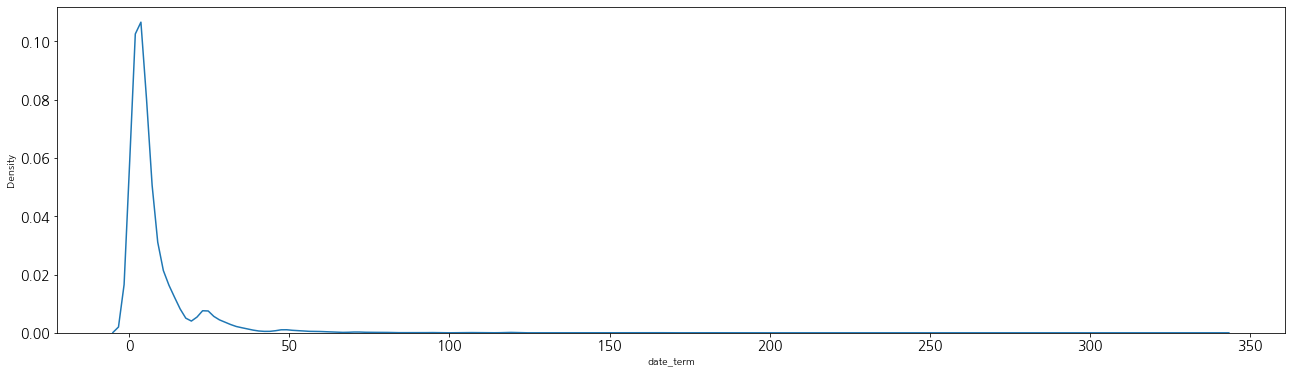

In [43]:
sns.kdeplot(df1['date_term'])

In [44]:
df1['gender'] = df1['gender'].astype(int)
df1['car_model'] = df1['car_model'].astype(int)

In [45]:
df1.describe()

,age_group,gender,car_model,r_week_day,s_week_day,is_weekend,r_weeknum,r_year,s_weeknum,s_year,date_term,term_normal
count,16806.000000,16806.000000,16806.000000,16806.000000,16806.000000,16806.000000,16806.000000,16806.0,16806.00000,16806.000000,16806.000000,16806.000000
mean,1.588004,0.850827,2.559503,3.291146,3.243782,0.350054,25.748364,2019.0,25.71653,2018.999940,7.815703,0.023100
std,0.861464,0.440377,1.642597,2.034344,2.019014,0.477001,13.307748,0.0,13.30380,0.007714,11.983983,0.035421
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2019.0,1.00000,2018.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,2.000000,1.250000,0.000000,15.000000,2019.0,15.00000,2019.000000,2.190000,0.006000
50%,1.000000,1.000000,2.000000,3.000000,3.000000,0.000000,26.000000,2019.0,26.00000,2019.000000,4.170000,0.012000
75%,2.000000,1.000000,4.000000,5.000000,5.000000,1.000000,37.000000,2019.0,37.00000,2019.000000,8.120000,0.024000
max,5.000000,2.000000,9.000000,6.000000,6.000000,1.000000,48.000000,2019.0,52.00000,2019.000000,338.320000,1.000000


In [46]:
df2 = df1[['age_group', 'gender','car_model','r_week_day','s_week_day', 
           'is_weekend','r_weeknum','s_weeknum','date_term','term_normal']]

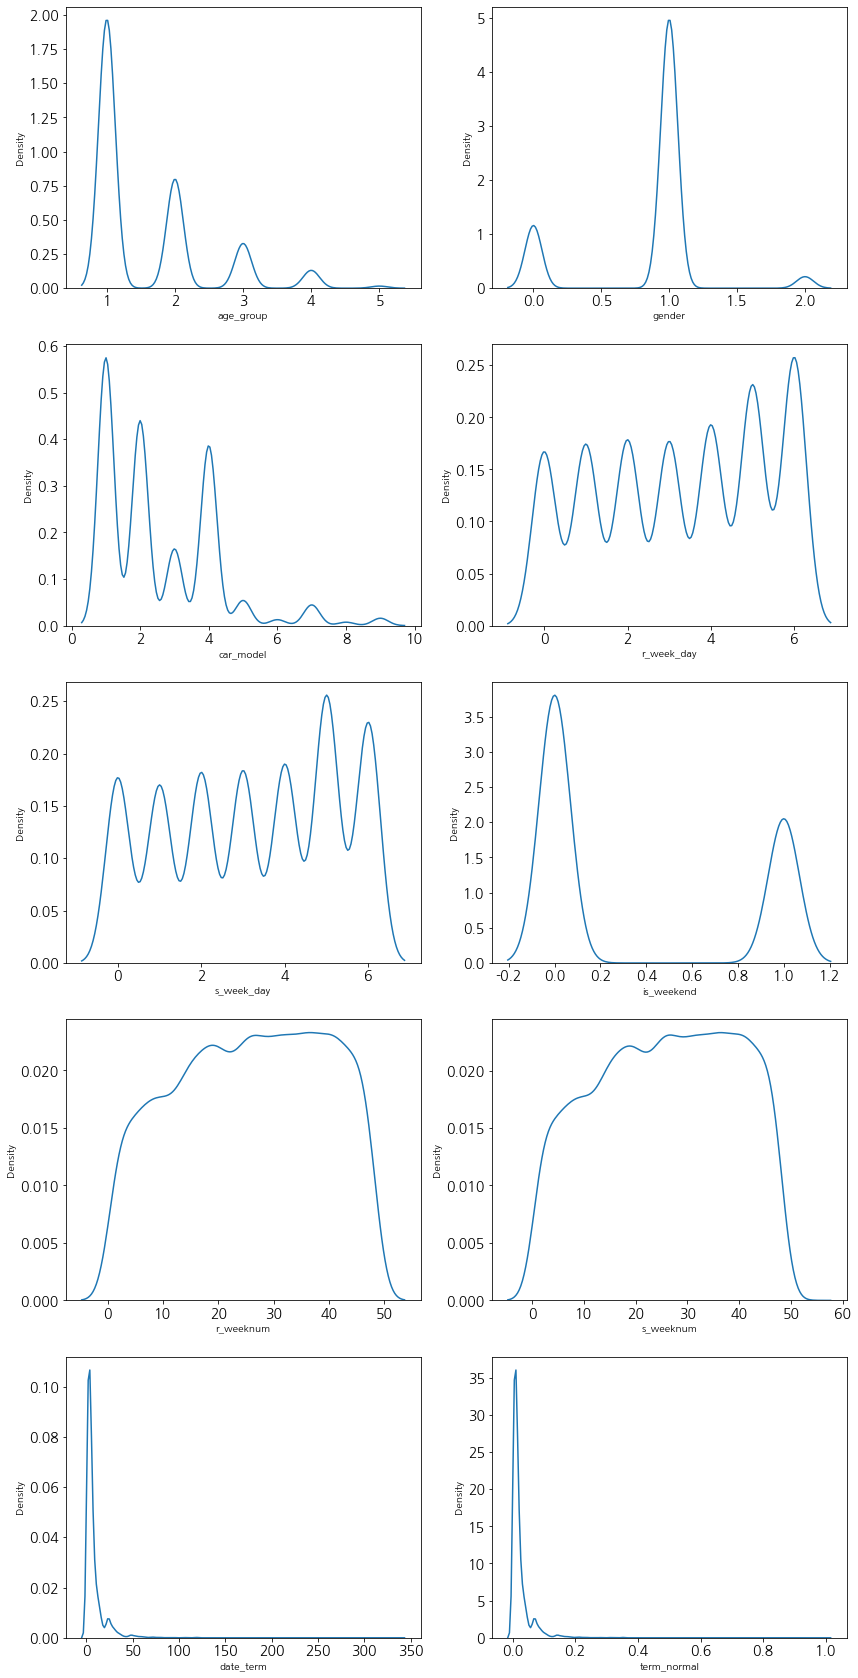

In [47]:
# 5) data 호가인 grapes ............... 중요 log변환  
# 아래거 하 ㄴ후 다시
plt.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots(5, 2, figsize=(14, 30))   # 가로스크롤 때문에 그래프 확인이 불편하다면 figsize의 x값을 조절해 보세요. 

# id 변수(count==0인 경우)는 제외하고 분포를 확인합니다.
count = 0
columns = df2.columns
for row in range(5):
    for col in range(2):
        sns.kdeplot(df2[columns[count]], ax=ax[row][col])
        #ax[row][col].set_title(columns[count], fontsize=15)
        count += 1
        if count == 10:
            break

In [48]:
len(df1)

16806

In [49]:
# # 이상치 확인 : Pclass 이상치 없음(95% 수준), age(95% 초과 : 69개  )
def outlier(df, col, z):
    return df[abs(df[col] - np.mean(df[col]))/np.std(df[col]) <= z].index

In [50]:
outlier_df = df1.loc[outlier(df1, 'date_term', 1)]   #2=95, 1 =68%
print(len(outlier_df))
print(round(len(outlier_df)/len(df1),2))

15131
0.9


In [51]:
# outlier_df = outlier_df.loc[outlier(outlier_df, 'age_group', 2)]
# len(outlier_df)

In [52]:
# outlier_df = outlier_df.loc[outlier(outlier_df, 'car_model', 2)]
# len(outlier_df)

In [53]:
# outlier_df = outlier_df.loc[outlier(outlier_df, 's_weeknum', 2)]
# len(outlier_df)

In [54]:
def arima_sarima(data):
    print('ARIMA')
    df_function = pd.DataFrame(data['reservation_start_date'].value_counts())
    df_function.reset_index(inplace = True)
    df_function.columns = ['Date', 'Demand']
    df_function.sort_values(by = ['Date'], inplace = True)
    df_function['Date'] = df_function['Date'].astype(str)

    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 8))  
    plt.plot(df_function['Date'], df_function['Demand'])
    plt.xticks(rotation = 45)
    loc = plticker.MultipleLocator(base = 30.0) 
    ax.xaxis.set_major_locator(loc)
    plt.show()

    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 8))  
    plt.plot(df_function['Date'][0:100], df_function['Demand'][0:100], "b.-")
    plt.xticks(rotation = 45)
    loc = plticker.MultipleLocator(base = 7.0) 
    ax.xaxis.set_major_locator(loc)
    plt.show()

    df_function['Date'] = pd.to_datetime(df_function['Date'])
    df_function.set_index('Date', inplace = True)

    demand_rate = df_function['Demand']
    STL_decomposed = STL(demand_rate, seasonal = 7, period = 7).fit()
    fig = STL_decomposed.plot()
    fig.set_size_inches(10, 16)

    for ax in fig.axes :
        loc = plticker.MultipleLocator(base = 30.0) 
        ax.xaxis.set_major_locator(loc)
        ax.xaxis.set_minor_locator(loc)
        ax.tick_params(axis='x', labelrotation = 45)
    
    plt.show()
    print(STL_decomposed.resid[STL_decomposed.resid > 0.1])

    demand_rate_replace = demand_rate.copy()
    demand_rate_replace[STL_decomposed.resid>0.1] = np.NaN
    demand_rate_replace = demand_rate_replace.interpolate(method='linear') 

    STL_decomposed_replace = STL(demand_rate_replace, seasonal = 7, period = 7).fit()
    fig = STL_decomposed_replace.plot()
    fig.set_size_inches(10, 16)

    for ax in fig.axes :
        loc = plticker.MultipleLocator(base = 30.0) 
        ax.xaxis.set_major_locator(loc)
        ax.xaxis.set_minor_locator(loc)
        ax.tick_params(axis='x', labelrotation = 45)
    
    plt.show()
    print(STL_decomposed_replace.resid[STL_decomposed_replace.resid > 0.1])    

    plot_acf(demand_rate_replace)
    plot_pacf(demand_rate_replace)
    plt.show()

    demand_rate_diff = demand_rate_replace.diff(7).dropna()
    plot_acf(demand_rate_diff)
    plot_pacf(demand_rate_diff)
    plt.show()

    demand_rate_diff = pd.DataFrame(demand_rate_diff)
    demand_rate_diff.columns = ['Diff']

    p_value = adfuller(demand_rate_diff.reset_index().Diff)[1]
    print(f'p-value of ADF test (diff 7): {p_value}')
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))
    plt.plot(demand_rate_diff.reset_index().Diff);
    plt.show()

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))
    plt.plot(demand_rate_diff.reset_index().Diff[0:100], "b.-")
    plt.show()

    arima_rate_train = demand_rate_diff[demand_rate_diff.index<'2019-09-08']
    arima_rate_test = demand_rate_diff[demand_rate_diff.index>='2019-09-08']
    model = sm.tsa.arima.ARIMA(arima_rate_train, order=(3, 1, 1))  
    fitted_m = model.fit()  
    print(fitted_m.summary())

    plot_predict(fitted_m)
    plt.show()

    fc = fitted_m.forecast(len(arima_rate_test), alpha = 0.05)  

    arima_rmse = np.sqrt(sklearn.metrics.mean_squared_error(arima_rate_test, fc))
    print(f'Test RMSE: {arima_rmse}\n')

    fc_series = pd.Series(fc, index = arima_rate_test.index)   

    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 8))

    plt.plot(arima_rate_train, alpha = 0.5, color = 'black', label = 'training')
    plt.plot(arima_rate_test, alpha = 0.5, color = 'red', label = 'actual operation rate')
    plt.plot(fc_series, alpha = 0.5, color = 'blue', label = 'predicted operation rate')
    plt.legend()

    plt.xticks(rotation = 45)
    loc = plticker.MultipleLocator(base = 30.0) 
    ax.xaxis.set_major_locator(loc)

    plt.show()

    print('\n\n\n\nSARIMA')
    model_auto_arima = pm.auto_arima(arima_rate_train, seasonal = True, m = 7, D = 1) 
    print(model_auto_arima)
    print(model_auto_arima.params())
    print(model_auto_arima.aic())

    sarima_rate_pred, conf_int = model_auto_arima.predict(n_periods = arima_rate_test.shape[0], return_conf_int = True)
    sarima_rmse = np.sqrt(sklearn.metrics.mean_squared_error(arima_rate_test, sarima_rate_pred))
    print(f'Test RMSE: {sarima_rmse}\n')

    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 8))
    plt.xticks(rotation = 45)
    loc = plticker.MultipleLocator(base = 7.0) 
    ax.xaxis.set_major_locator(loc)

    plt.plot(arima_rate_train[-50:], alpha = 0.5, color = 'black', label = 'training')
    plt.plot(arima_rate_test, alpha = 0.5, color = 'red', label = 'actual operation rate')
    plt.plot(arima_rate_test.index.values, sarima_rate_pred, alpha = 0.5, color = 'blue', label = 'predicted operation rate')
    plt.fill_between(arima_rate_test.index.values, conf_int[:, 0], conf_int[:, 1], alpha = 0.1, color = 'b') 
    plt.legend()
    plt.show()

    model_auto_arima.plot_diagnostics(figsize=(10, 10))
    plt.show()

ARIMA


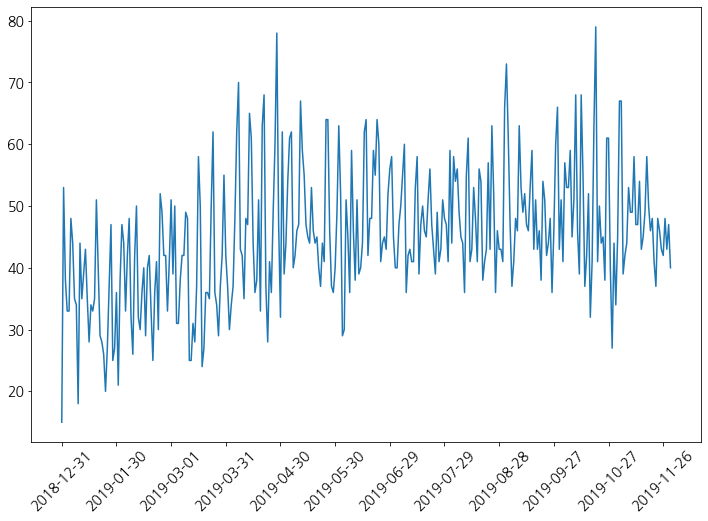

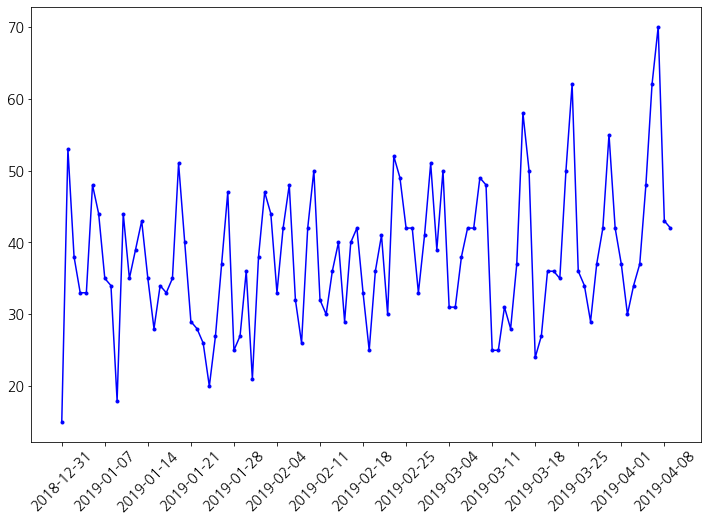

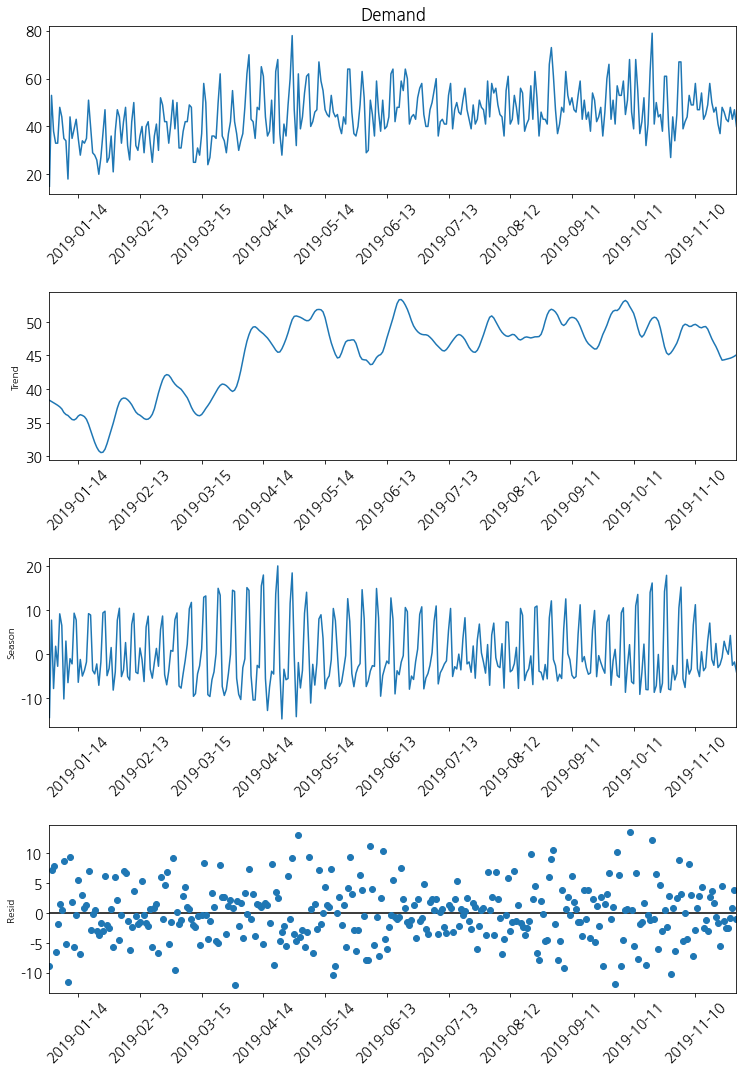

Date
2019-01-01    7.142225
2019-01-02    7.905079
2019-01-05    1.496061
2019-01-06    0.465808
2019-01-07    8.722231
                ...   
2019-11-18    3.720390
2019-11-19    1.677477
2019-11-23    4.478465
2019-11-28    0.843754
2019-11-29    3.916268
Name: resid, Length: 159, dtype: float64


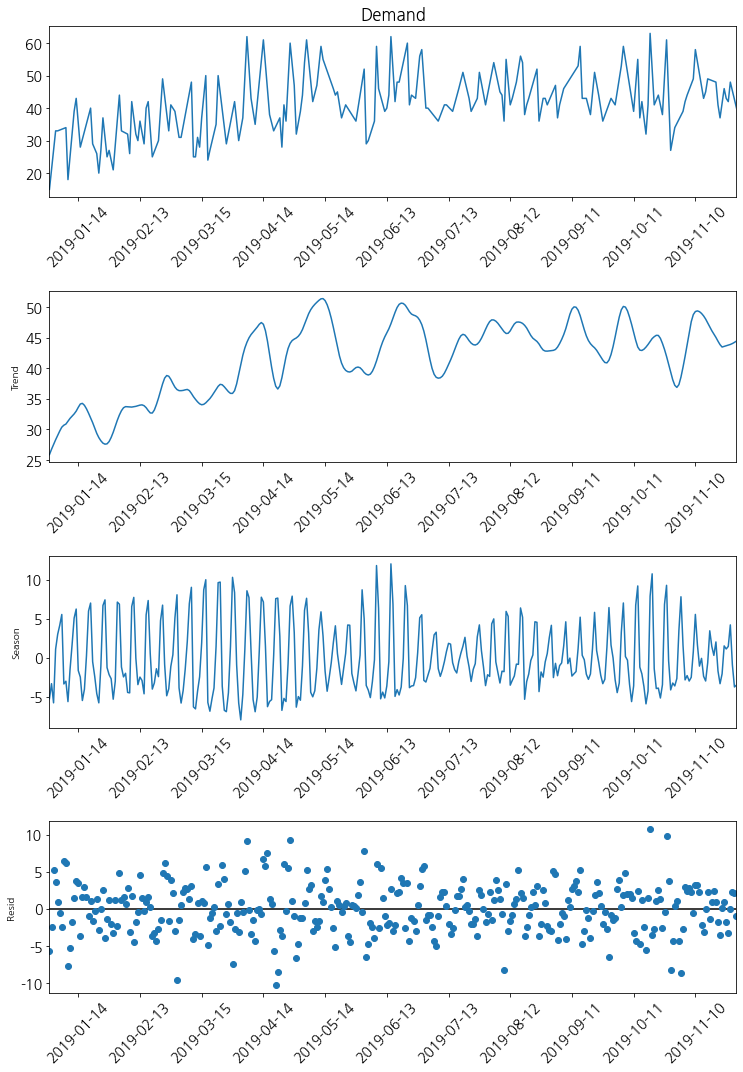

Date
2019-01-02    5.237615
2019-01-03    3.599467
2019-01-04    0.973789
2019-01-07    6.425493
2019-01-08    6.143338
                ...   
2019-11-20    0.945004
2019-11-23    0.103220
2019-11-24    0.922526
2019-11-28    2.217101
2019-11-29    2.188940
Name: resid, Length: 168, dtype: float64


/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


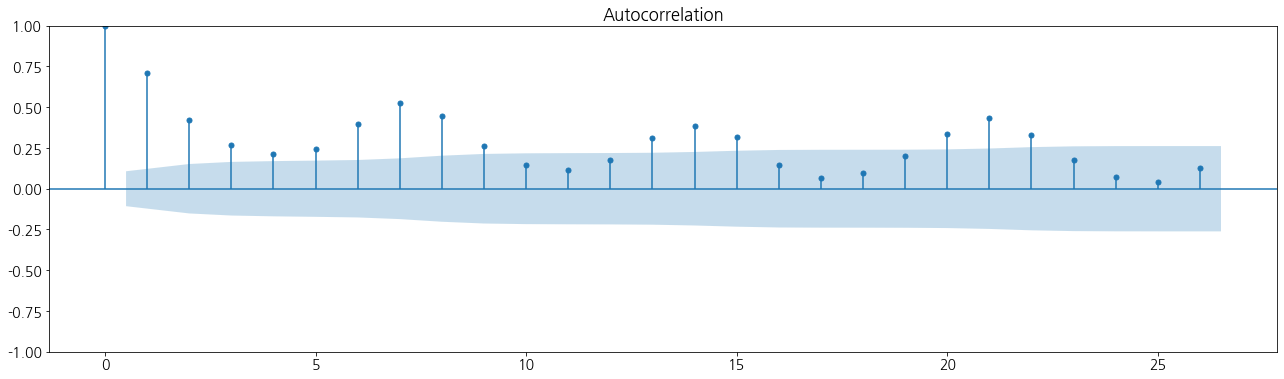

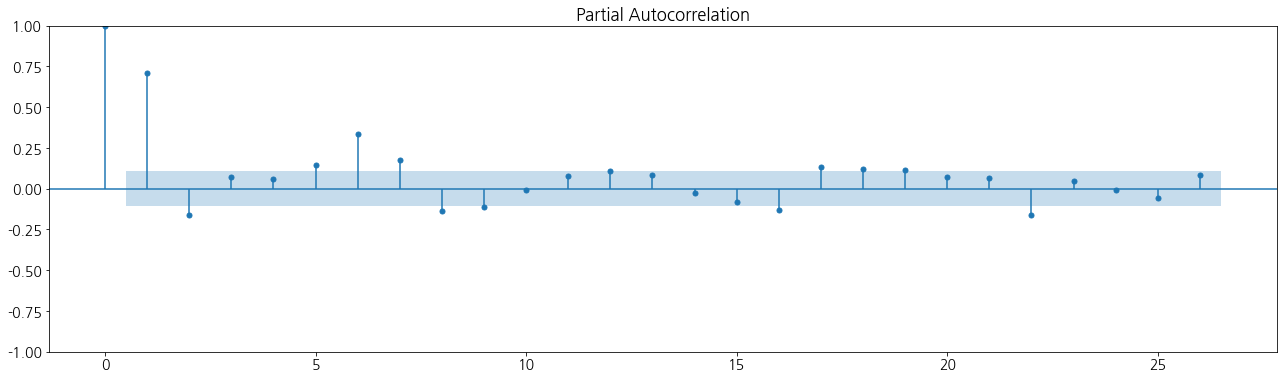

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


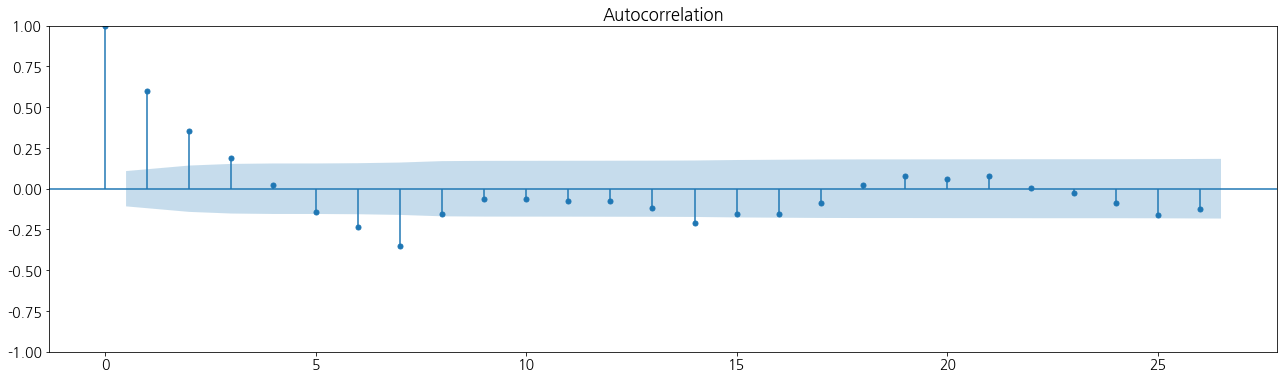

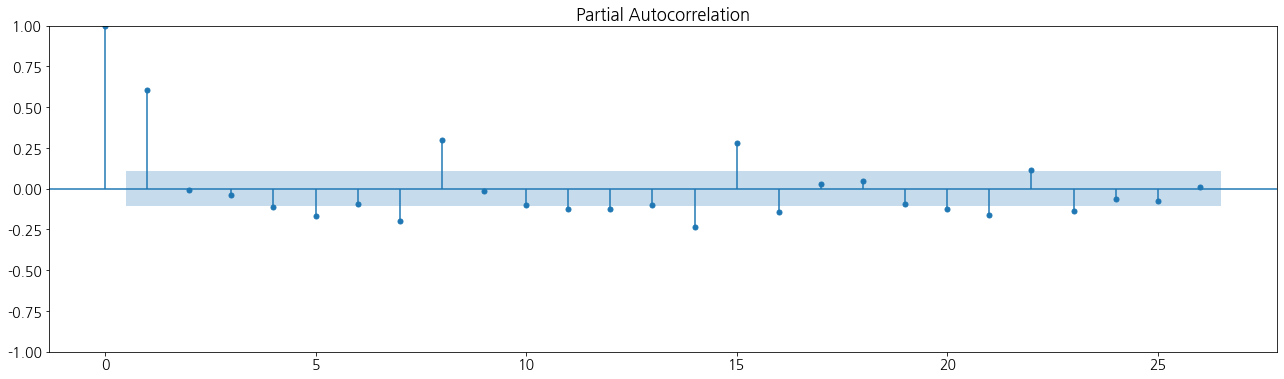

p-value of ADF test (diff 7): 3.552623173503811e-07


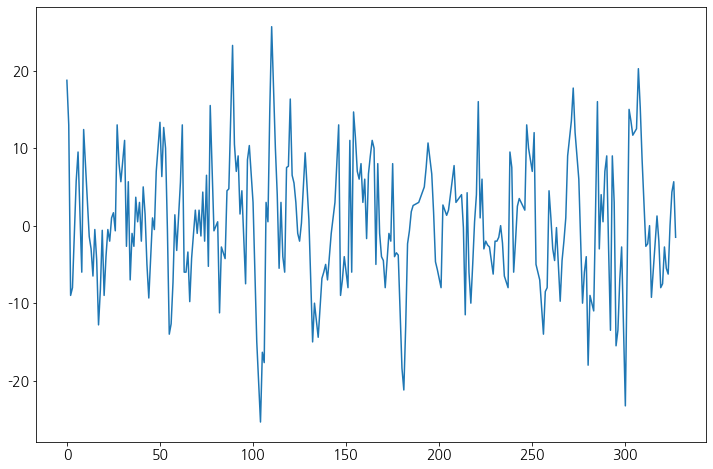

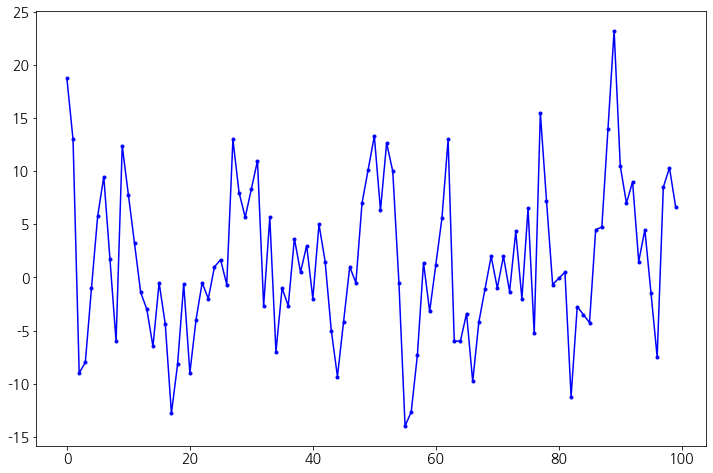

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:                   Diff   No. Observations:                  244
Model:                 ARIMA(3, 1, 1)   Log Likelihood                -795.598
Date:                Mon, 23 Jan 2023   AIC                           1601.197
Time:                        07:11:39   BIC                           1618.662
Sample:                    01-07-2019   HQIC                          1608.232
                         - 09-07-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5795      0.056     10.417      0.000       0.470       0.689
ar.L2          0.1211      0.071      1.706      0.088      -0.018       0.260
ar.L3         -0.1381      0.066     -2.077      0.0

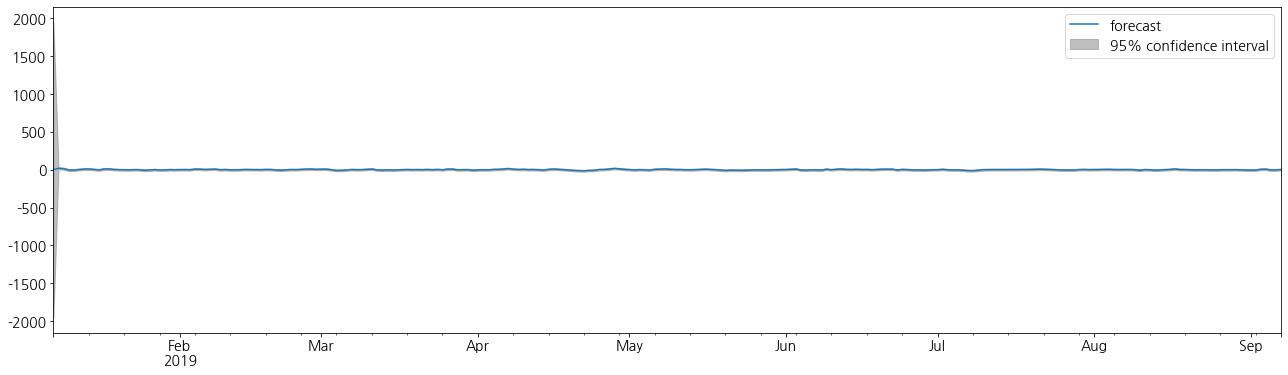

Test RMSE: 9.08148459273576



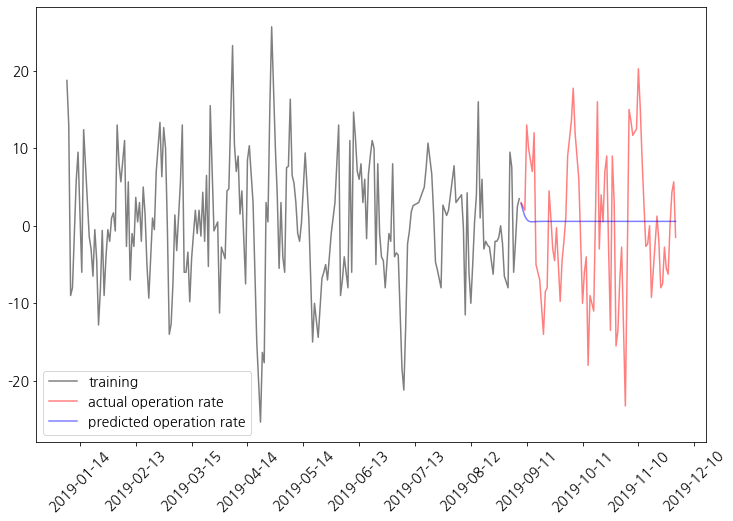





SARIMA
 ARIMA(1,0,0)(2,1,0)[7]          
[ 0.63786061 -0.81821271 -0.56879033 53.44343118]
1631.6549266207394
Test RMSE: 9.48456294154353



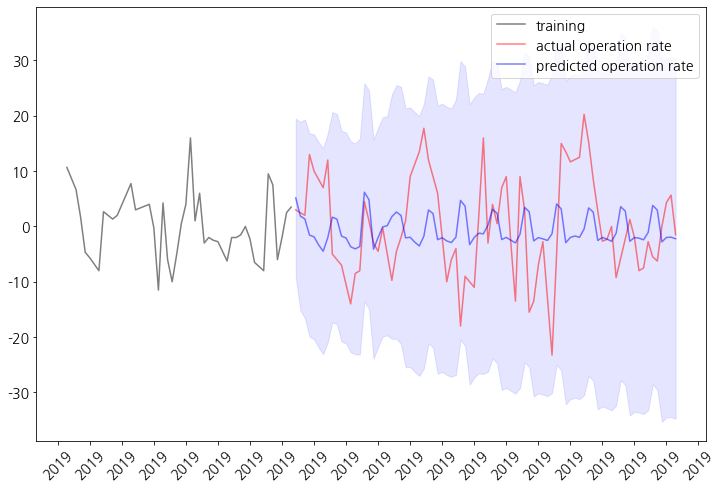

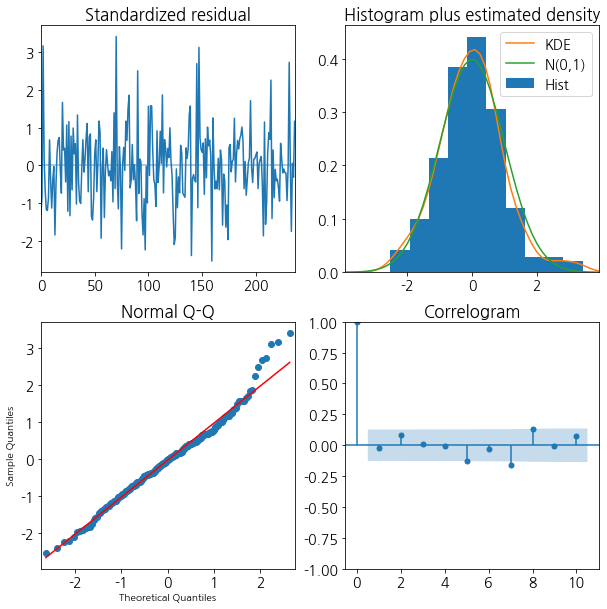

In [55]:
arima_sarima(outlier_df)

In [56]:
#age_group 제외
age1_df1 = outlier_df[outlier_df['age_group'] <= 3]
print(len(age1_df1))
car_df1 = age1_df1[age1_df1['car_model'] <= 4]
print(len(car_df1))
# age1_df1 = age1_df1.loc[outlier(age1_df1, 'age_group', 2)]
# print(len(age1_df1))

14482
13432


ARIMA


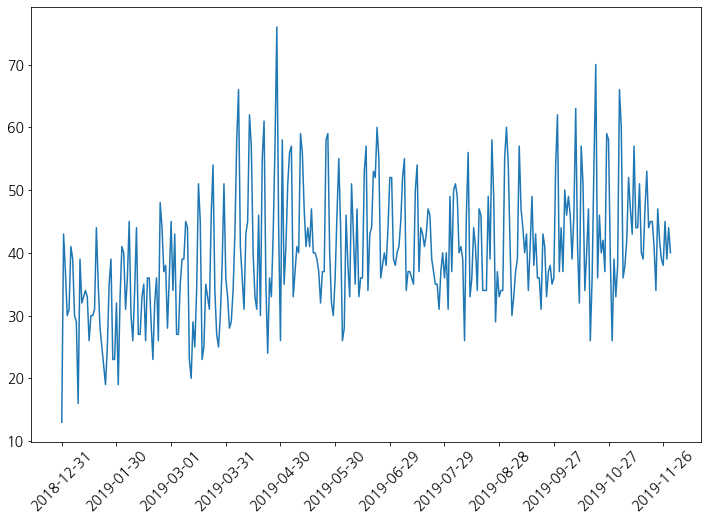

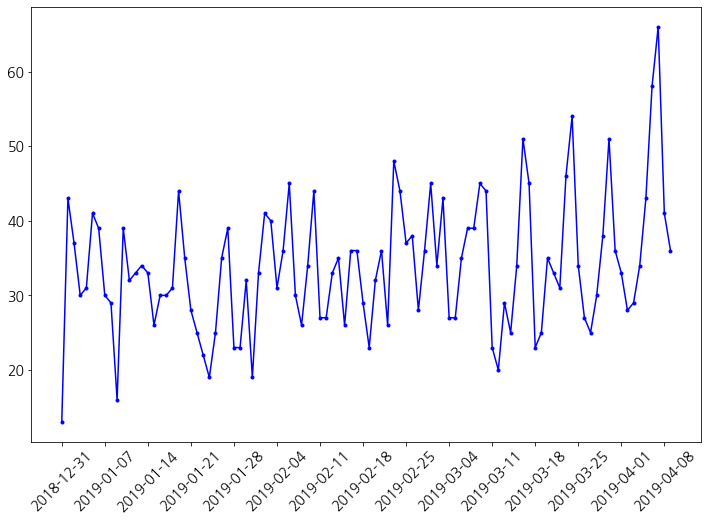

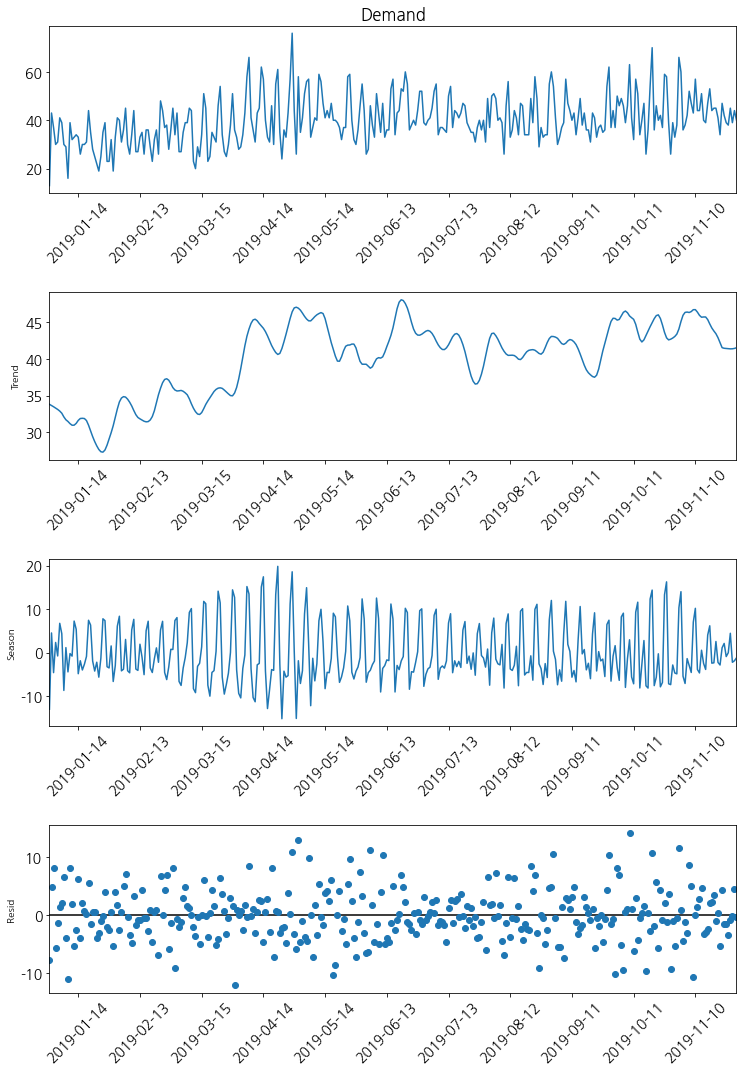

Date
2019-01-01    4.775518
2019-01-02    8.088982
2019-01-05    1.320137
2019-01-06    1.991860
2019-01-07    6.573356
                ...   
2019-11-18    2.164969
2019-11-19    3.496260
2019-11-21    0.304735
2019-11-23    4.301419
2019-11-29    4.396805
Name: resid, Length: 151, dtype: float64


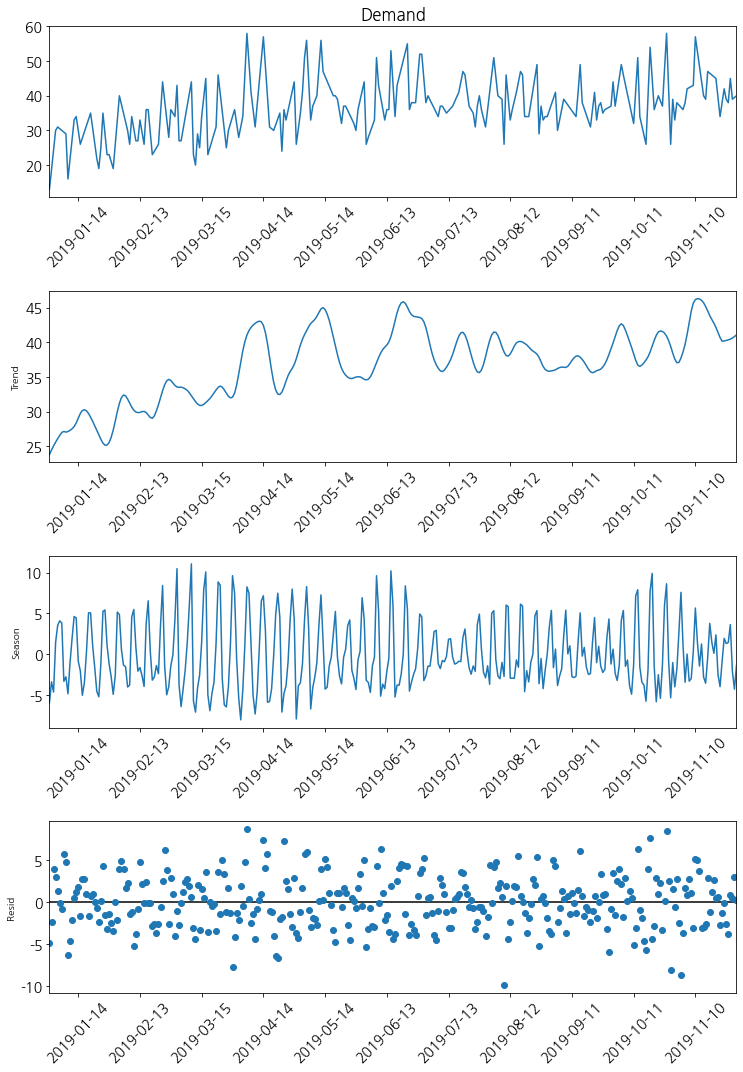

Date
2019-01-02    3.934406
2019-01-03    2.942596
2019-01-04    1.360200
2019-01-07    5.680588
2019-01-08    4.735638
                ...   
2019-11-21    0.542718
2019-11-27    0.886359
2019-11-28    0.444986
2019-11-29    2.954396
2019-11-30    0.230430
Name: resid, Length: 161, dtype: float64


/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


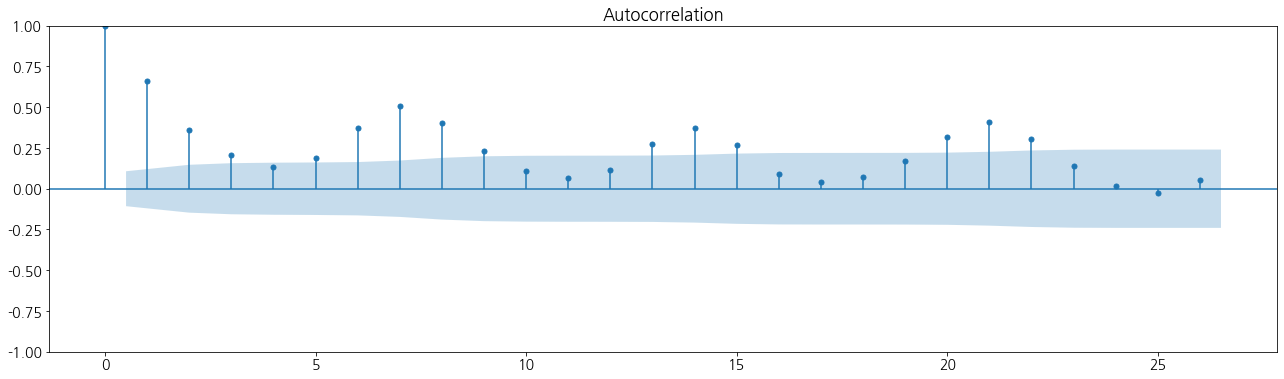

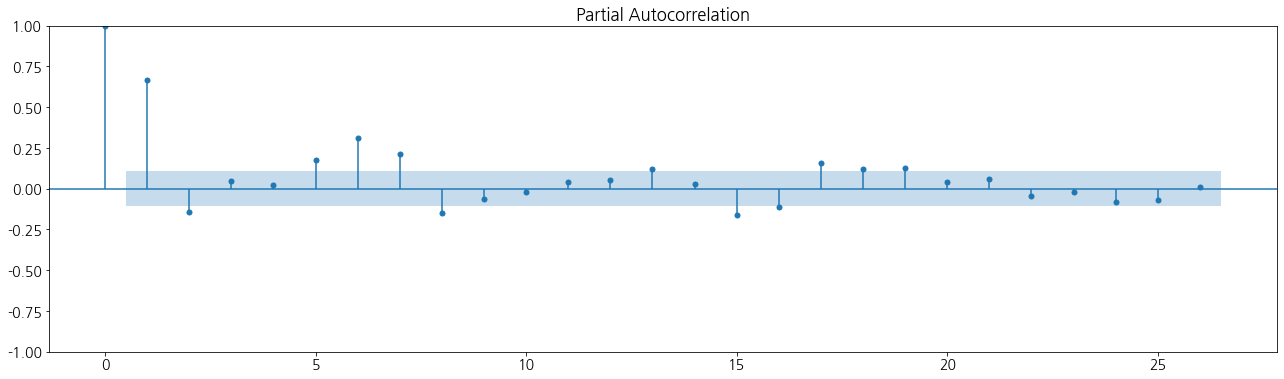

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


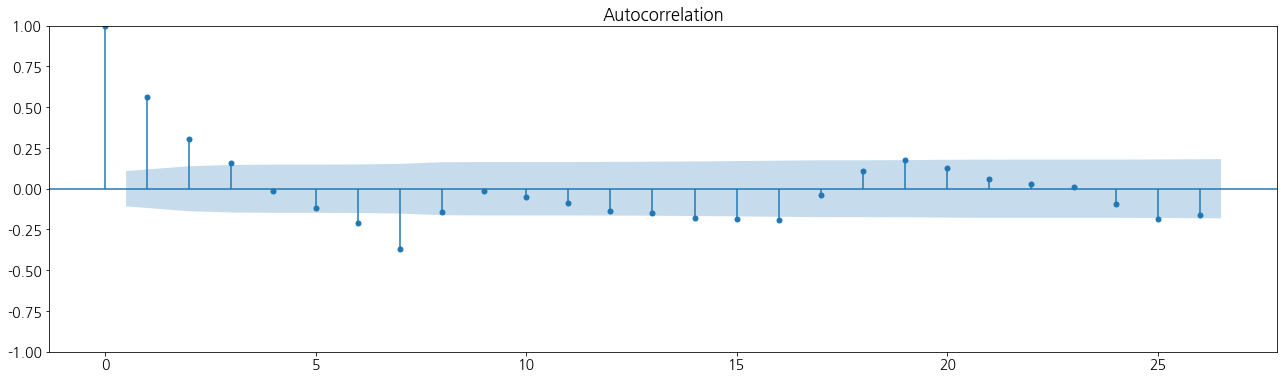

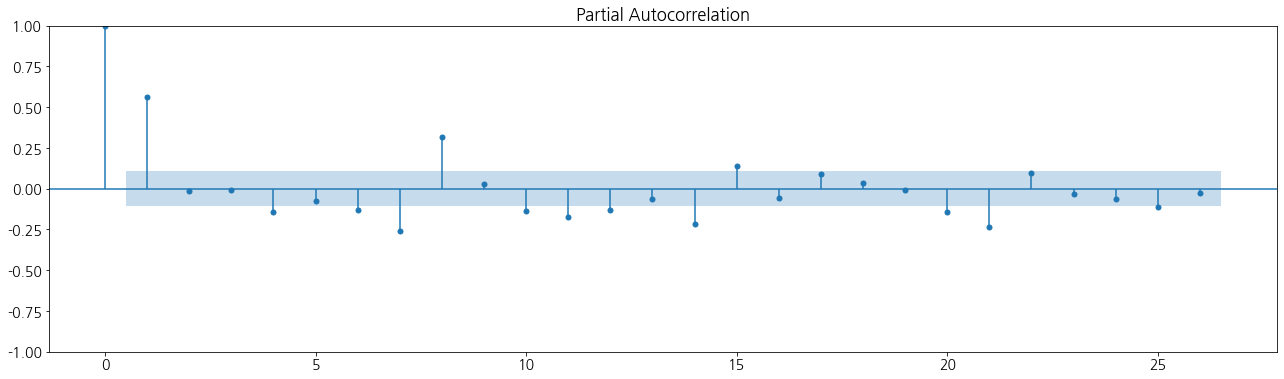

p-value of ADF test (diff 7): 2.8887147404248277e-08


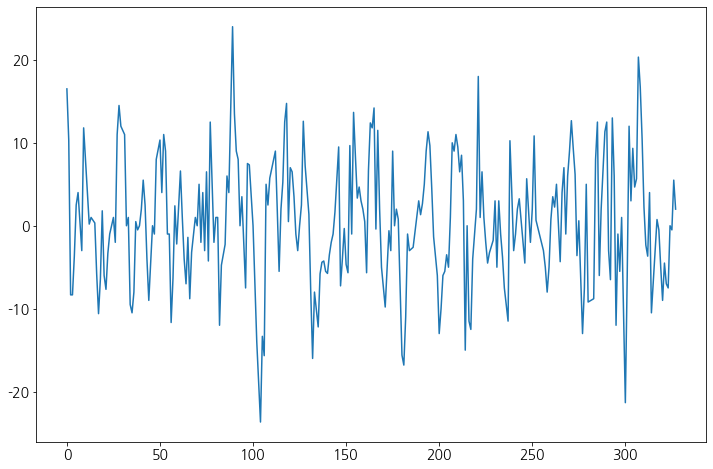

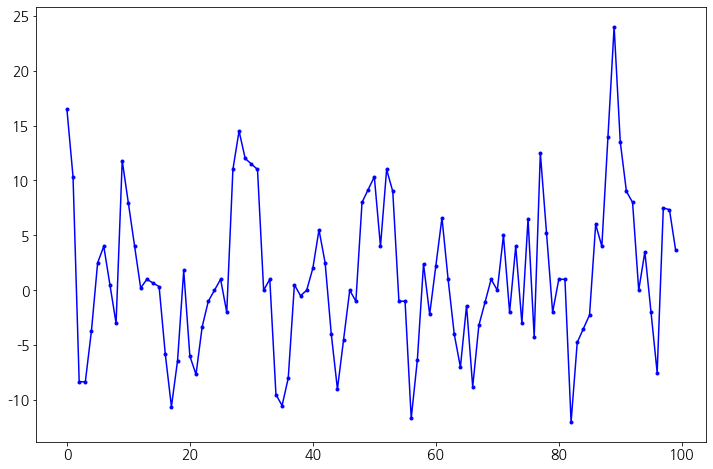

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:                   Diff   No. Observations:                  244
Model:                 ARIMA(3, 1, 1)   Log Likelihood                -777.662
Date:                Mon, 23 Jan 2023   AIC                           1565.325
Time:                        07:12:05   BIC                           1582.790
Sample:                    01-07-2019   HQIC                          1572.360
                         - 09-07-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5977      0.060      9.909      0.000       0.480       0.716
ar.L2          0.1097      0.072      1.518      0.129      -0.032       0.251
ar.L3         -0.1312      0.070     -1.866      0.0

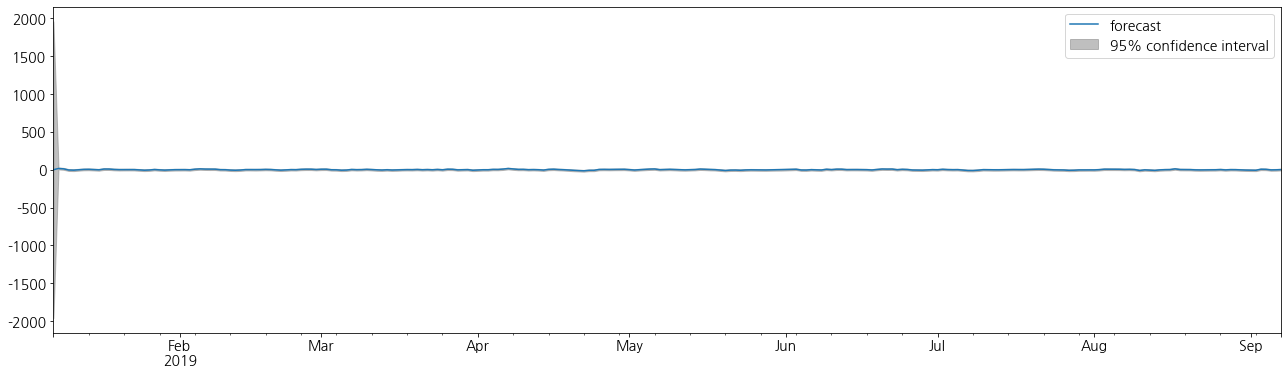

Test RMSE: 7.45305184960978



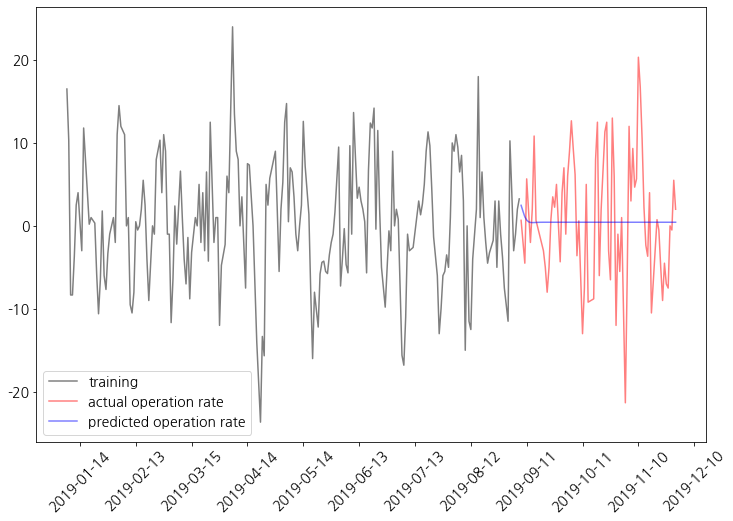





SARIMA
 ARIMA(1,0,0)(2,1,0)[7]          
[ 0.63196649 -0.85669969 -0.49426644 48.43180529]
1607.3261646490296
Test RMSE: 8.053457353883655



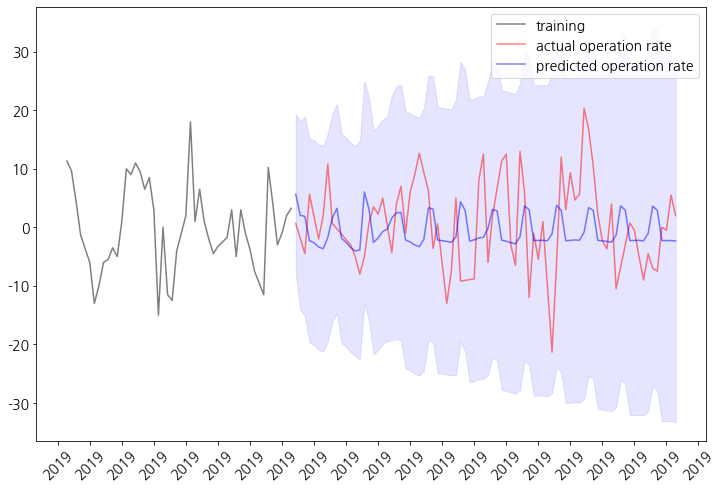

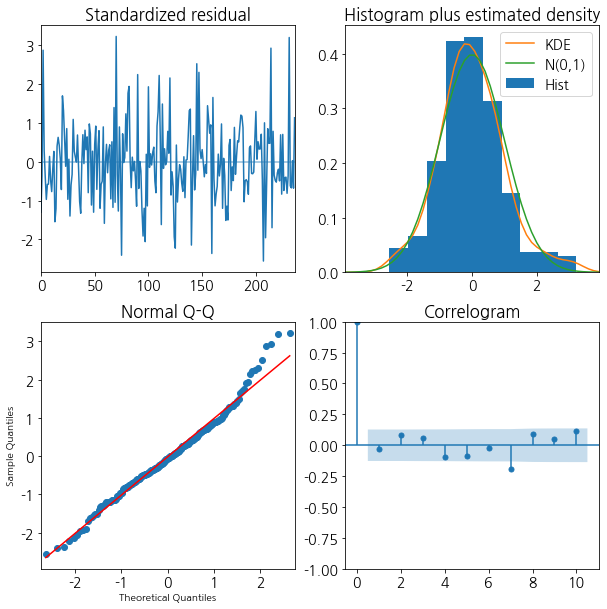

In [57]:
arima_sarima(car_df1)